Uncomment the next cell if you're using in Collab

In [7]:
#import os
#PARENT = os.path.dirname(os.getcwd())
#if not os.path.isdir(os.path.join(PARENT, '/palaeographic-variability-analysis-grandes-chroniques-fr-2813')):
#  !git clone https://github.com/malamatenia/palaeographic-variability-analysis-grandes-chroniques-fr-2813.git
#  %cd /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813
#  !pip install -r requirements.txt

In [6]:
#base imports
import os
import sys
from pathlib import Path
import rootutils
from IPython.display import display

#LateX font style
import matplotlib as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.rcParams['text.usetex'] = False


In [8]:
root_path = Path(str(rootutils.find_root(search_from=os.getcwd(), indicator=".init_fr2813")))
sys.path.append(str(root_path / 'scripts' / 'utils'))
print(f"Root path: {root_path}")
from utils_stats import (
    filter_dataset,
    compute_macro_statistics,
    compute_abbreviative_mark_frequencies,
    plot_abbreviative_mark_histogram,
    compute_sequence_abbreviation_frequency,
    plot_sequence_abbreviation_histogram,
    compute_relative_position_histogram,
    create_metadata_mapping,
    calculate_line_statistics,
    create_line_scatter_plot
)

Root path: /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813


In [9]:
root_path = Path(str(rootutils.find_root(search_from=os.getcwd(), indicator=".init_fr2813")))

# Dataset and related paths
dataset_path = root_path / "data" / "processed_dataset"
annotation_json_path = dataset_path / "annotation.json"
images_path = dataset_path / "images"
full_images_path = root_path / "data" / "raw_ground_truth"/ "images"

# Results and assets
stats_dir = root_path / "results" / "statistical_analysis"
junicode_font_path = root_path / "Junicode.ttf"

We begin by filtering the dataset into two subsets: one excluding Latin-script pages, and another containing only full lines (excluding shortened or rubric lines).

In [10]:
# Output paths for our two filtered subsets
annotation_no_latin_path = dataset_path / 'annotation_no_latin.json'
annotation_full_lines_path = dataset_path / 'annotation_full_lines.json'

annotation_no_latin, annotation_full_lines = filter_dataset(
    annotation_json_path,
    annotation_no_latin_path,
    annotation_full_lines_path
)

Now that we have our sub-datasets, we can start the statistical analysis. First, we’ll look at the macro statistics related to general abbreviation rates.

In [11]:
macro_statistics = compute_macro_statistics(annotation_no_latin)
display(macro_statistics)

csv_file_path = os.path.join(stats_dir, "macro_statistic_results.csv")
macro_statistics.to_csv(csv_file_path, index=False)

print(f"Results saved to {csv_file_path}")

,Graphic Profile,Total Lines,Total Characters,Special Characters Count,Special Characters Percentage,Graphic Units: Total,Abbreviated Graphic Units,Abbreviated Graphic Units: Percentage
2,GP1,2400,83395,3591,4.3,20352,3429,16.8
1,GP2,2009,62680,866,1.4,14542,848,5.8
0,GP3,1590,54444,551,1.0,12709,535,4.2
3,GP4,464,15940,204,1.3,3652,197,5.4


Results saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/statistical_analysis/macro_statistic_results.csv


Next up, building on the general abbreviation rates, we calculate the frequency of specific abbreviative marks per GP.

,GP1 Count (%),GP2 Count (%),GP3 Count (%),GP4 Count (%)
̃,1617 (45.03%),406 (46.88%),257 (46.64%),113 (55.39%)
⁊,564 (15.71%),183 (21.13%),67 (12.16%),2 (0.98%)
ẜ,58 (1.62%),90 (10.39%),53 (9.62%),19 (9.31%)
ꝑ,292 (8.13%),13 (1.50%),25 (4.54%),11 (5.39%)
̾,354 (9.86%),21 (2.42%),12 (2.18%),10 (4.90%)
ł,130 (3.62%),20 (2.31%),24 (4.36%),8 (3.92%)
ͣ,145 (4.04%),15 (1.73%),17 (3.09%),4 (1.96%)
ͤ,6 (0.17%),25 (2.89%),22 (3.99%),6 (2.94%)
᷑,61 (1.70%),16 (1.85%),9 (1.63%),8 (3.92%)
ꝯ,178 (4.96%),6 (0.69%),10 (1.81%),2 (0.98%)


<Figure size 1400x800 with 0 Axes>

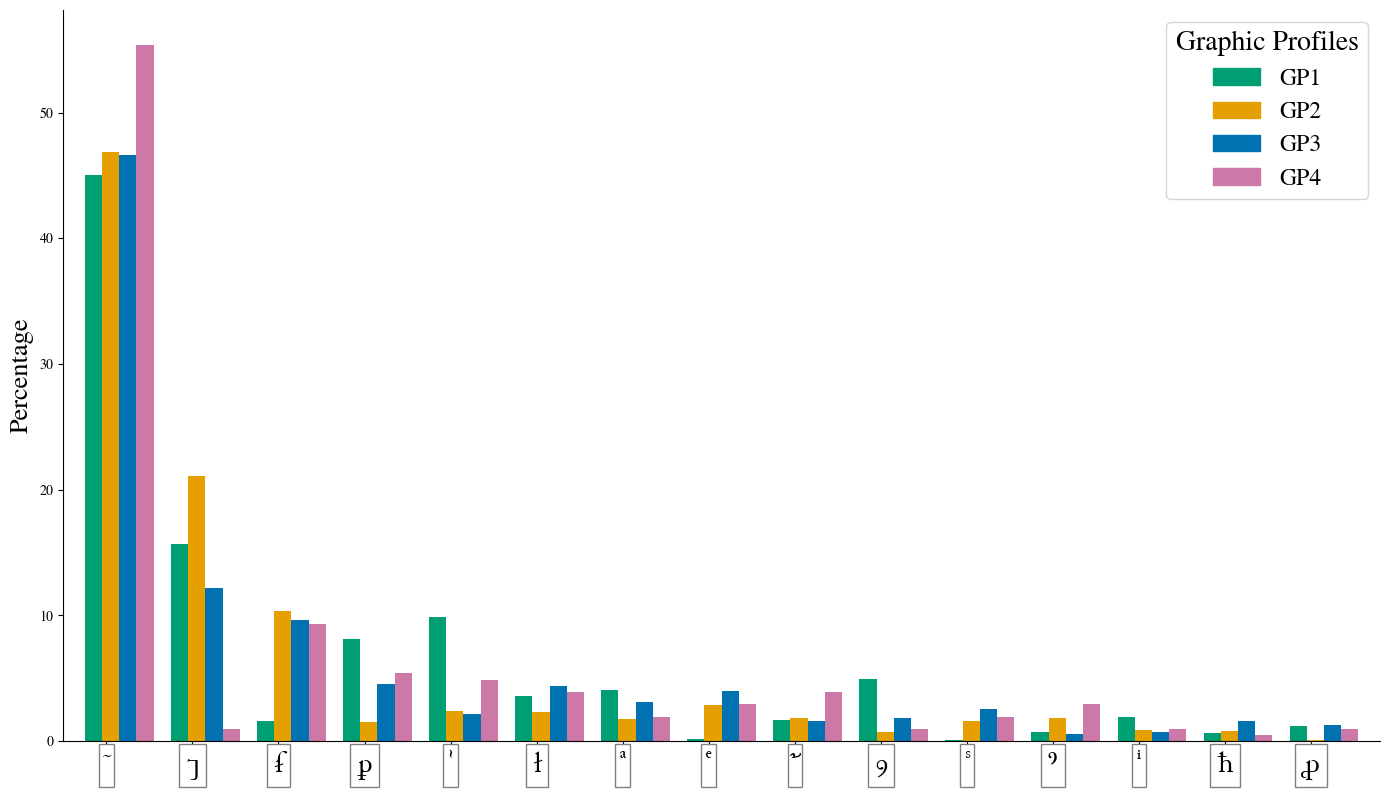

In [12]:
# Define common visual parameters
legend_labels = ["GP1", "GP2", "GP3", "GP4"]
gp_colors = {
    "GP1": "#009E73",
    "GP2": "#E69F00",
    "GP3": "#0072B2",
    "GP4": "#CC79A7",
}

# Compute frequencies
df = compute_abbreviative_mark_frequencies(annotation_no_latin)
display(df)

# Save to CSV
csv_file_path = stats_dir / "abbreviative_mark_frequency_per_GP.csv"
df.to_csv(csv_file_path, index=True)

abbreviative_mark_histogram = plot_abbreviative_mark_histogram(
    df,
    stats_dir,
    junicode_font_path,
    legend_labels,
    gp_colors,
    log_scale=False
)

Next, we dive deeper by calculating the specific syllabic abbreviation usage/frequency per GP

Next, we dive deeper by calculating the specific syllabic abbreviation usage/frequency per GP

In [13]:
abbreviation_map = {
    "⁊": [" et "], "ꝯ": ["com", "con"], "ꝰ": ["us "], "ꝑ": ["par", "per"], "ꝓ": ["pro"],
    "e᷑": ["eur"], "o᷑": ["our"], "ẜ": ["ser"], "qͥ": ["qui"],
    "ã": ["am", "an"], "ẽ": ["en", "em"], "õ": ["om", "on"], "ĩ": ["in", "im"],
    "q̃": ["que"], "m̃t": ["ment"], "p̾": ["pre"],
    "g̾": ["ger", "gier", "gre"], "b̾": ["ber", "bier", "bre"],
    "c̾": ["cer", "cier", "cre", "cetera"], "t̾": ["tre", "ter"],
    "u̾": ["uer"], "n̾": ["ner", "nier"], "m̾": [" mer"],
    "młt": ["moult"], "chłr": ["cheualier"], "bñ": ["bien"], "dc̃e":["dicte"]
}

abbreviation_sequence_frequency=compute_sequence_abbreviation_frequency(
    annotation_full_lines,
    abbreviation_map,
    legend_labels,
    stats_dir
)

,Abbreviated Sequence,Unabbreviated Sequences,GP1 Unabbr.,GP1 Abbr.,GP1 Total,GP1 % of abbr.,GP2 Unabbr.,GP2 Abbr.,GP2 Total,GP2 % of abbr.,GP3 Unabbr.,GP3 Abbr.,GP3 Total,GP3 % of abbr.,GP4 Unabbr.,GP4 Abbr.,GP4 Total,GP4 % of abbr.,Average %
23,młt,moult,0,66,66,100.0,6,8,14,57.1,10,11,21,52.4,0,2,2,100.0,77.375
7,ẜ,ser,47,58,105,55.2,57,87,144,60.4,25,50,75,66.7,10,18,28,64.3,61.650
24,chłr,cheualier,2,37,39,94.9,18,3,21,14.3,12,3,15,20.0,0,3,3,100.0,57.300
26,dc̃e,dicte,0,6,6,100.0,40,0,40,0.0,34,0,34,0.0,0,12,12,100.0,50.000
4,ꝓ,pro,29,41,70,58.6,38,1,39,2.6,14,7,21,33.3,4,2,6,33.3,31.950
11,õ,"om, on",790,434,1224,35.5,804,192,996,19.3,580,110,690,15.9,204,55,259,21.2,22.975
14,m̃t,ment,50,167,217,77.0,124,3,127,2.4,102,7,109,6.4,42,1,43,2.3,22.025
0,⁊,et,538,562,1100,51.1,594,181,775,23.4,609,65,674,9.6,194,2,196,1.0,21.275
3,ꝑ,"par, per",207,288,495,58.2,335,12,347,3.5,323,24,347,6.9,78,10,88,11.4,20.000
25,bñ,bien,13,29,42,69.0,18,1,19,5.3,39,1,40,2.5,5,0,5,0.0,19.200


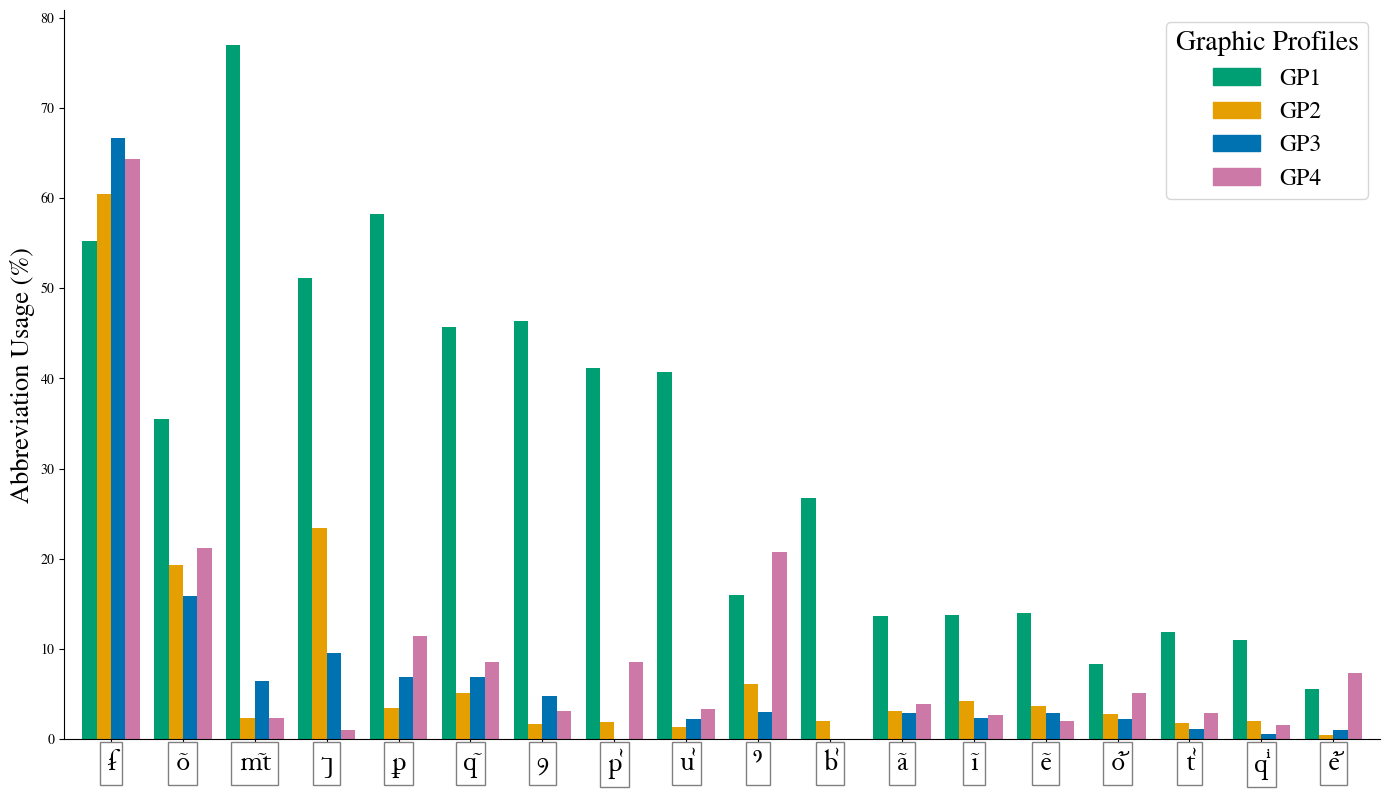

In [14]:
abbreviation_map_selected = {
    "⁊": [" et "], "ꝯ": ["com", "con"], "ꝰ": ["us "], "ꝑ": ["par", "per"],
    "e᷑": ["eur"], "o᷑": ["our"], "ẜ": ["ser"], "qͥ": ["qui"],
    "ã": ["am", "an"], "ẽ": ["en", "em"], "õ": ["om", "on"], "ĩ": ["in", "im"],
    "q̃": ["que"], "m̃t": ["ment"], "p̾": ["pre"],
    "b̾": ["ber", "bier", "bre"],
    "t̾": ["tre", "ter"],
    "u̾": ["uer"]
}

# Get just the abbreviation symbols (i.e., the keys)
abbreviation_subset = list(abbreviation_map_selected.keys())

# Now call the function with the subset
plot_sequence_abbreviation_histogram(
    abbreviation_sequence_frequency,
    legend_labels,
    gp_colors,
    junicode_font_path,
    stats_dir,
    abbreviation_subset=abbreviation_subset
)

Next, we move to Line Management Strategies. First, we calculate the relative position of abbreviations in the line.

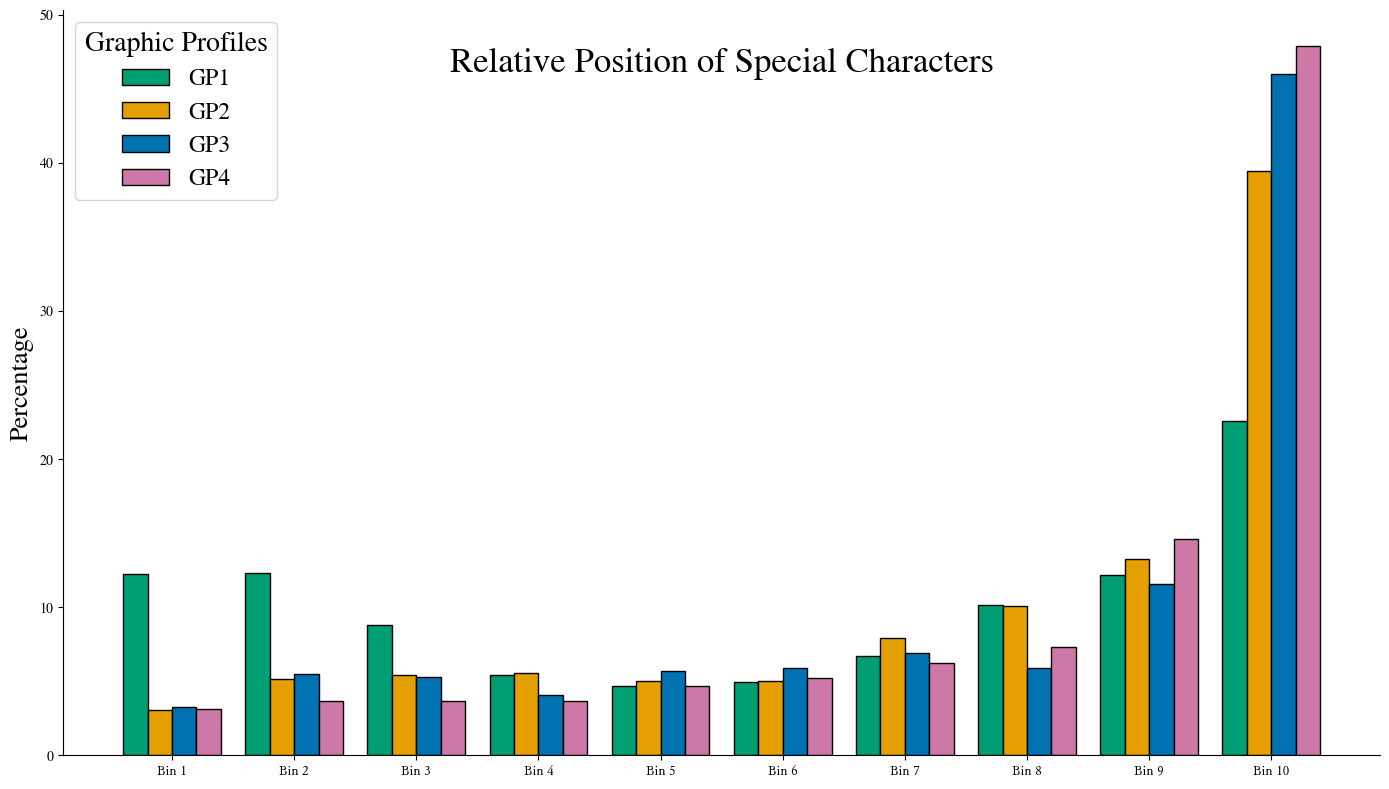

In [15]:
compute_relative_position_histogram(
    data=annotation_full_lines,
    font_path=junicode_font_path,
    output_path=stats_dir,
    legend_labels=legend_labels,
    gp_colors=gp_colors,
    count_threshold=0
)

Finally, we calculate the average line length (in mm), the standard deviation of this practice as a proxy for stability/instability, and the average number of characters per line.

Saved 'Average Statistics per Graphic Profile' to '/content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/statistical_analysis/average_line_statistics_per_GP.csv'


,Graphic Profile,Average Line Length (mm),Average Characters per Line,Average Standard Deviation (mm),Total Characters,Total Lines
0,GP1,63.7,42.3,1.3,100411,2373
1,GP2,64.9,38.2,3.1,70590,1849
2,GP3,66.2,41.9,3.0,60491,1442
3,GP4,64.5,41.7,3.3,18118,435
4,Unknown,0.0,0.0,0.0,0,0


Plotted 68 subfolders.
Skipped 0 subfolders without GP mapping.
Skipped 2 subfolders with less than 15 lines.


/content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/scripts/utils/utils_stats.py:664: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Scatter plot saved to /content/palaeographic-variability-analysis-grandes-chroniques-fr-2813/results/statistical_analysis/avg_line_length_characters_per_GP_scatterplot.png


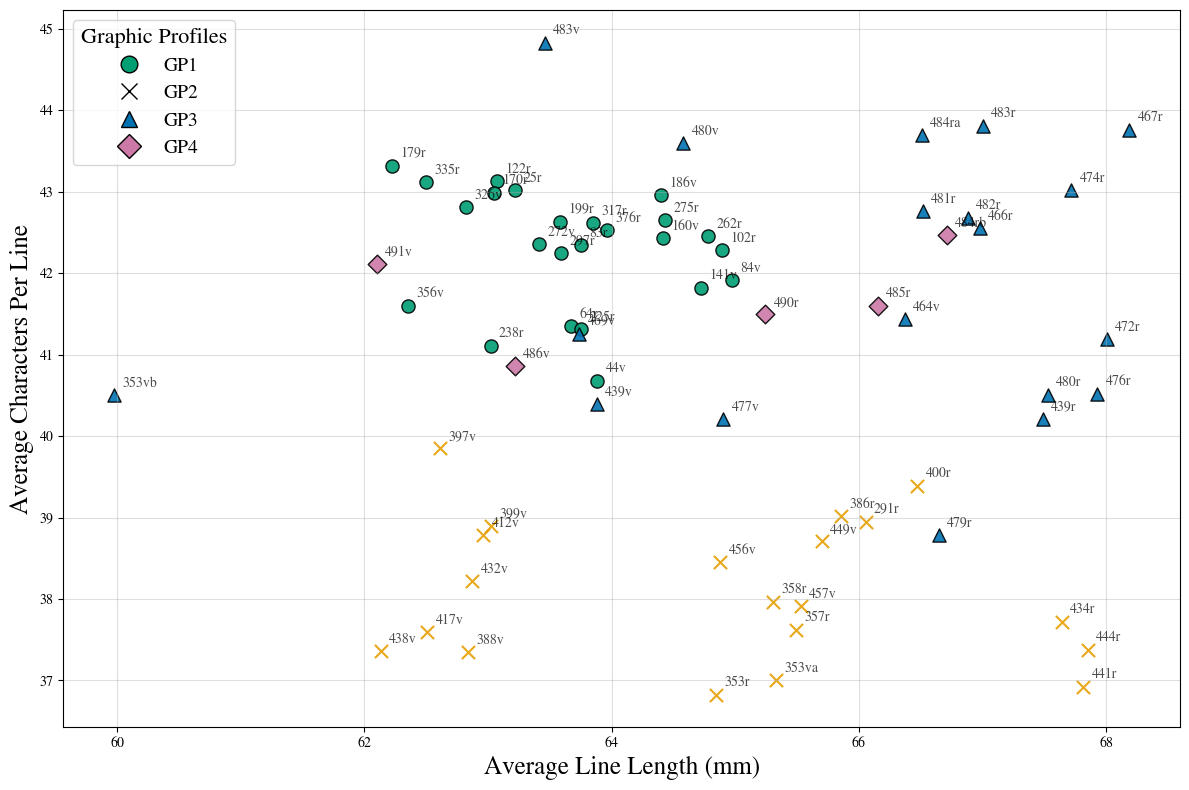

In [16]:
image_dpi = 400

gp_markers = {
    "GP1": "o",
    "GP2": "x",
    "GP3": "^",
    "GP4": "D",
}

df_subfolder_stats, df_gp_stats = calculate_line_statistics(
    images_path, full_images_path, annotation_full_lines_path, stats_dir, image_dpi
)

folio_mapping, graphic_profile_mapping = create_metadata_mapping(annotation_json_path)

create_line_scatter_plot(
    df_subfolder_stats,
    graphic_profile_mapping,
    folio_mapping,
    os.path.join(stats_dir, "avg_line_length_characters_per_GP_scatterplot.png"),
    gp_colors,
    gp_markers
)